In [19]:
# Tugas 1
import pandas as pd

In [4]:
df = pd.read_csv('data_sampah.csv')

In [13]:
print("5 Baris Pertama Dataset:")
df.head(5)

5 Baris Pertama Dataset:


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_sampah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,2229.42,TON/HARI,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,532.78,TON/HARI,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,924.26,TON/HARI,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,2989.75,TON/HARI,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,614.65,TON/HARI,2016


In [ ]:
df.info()
# Berdasarkan output .head(), dataset berisi data jumlah sampah per kabupaten/kota di Jawa Barat dengan kolom nama wilayah, tahun, dan volume sampah
# Dari .info(), terlihat dataset memiliki struktur yang lengkap tanpa missing values dan tipe data yang sesuai untuk analisis time series.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   189 non-null    int64  
 1   kode_provinsi        189 non-null    int64  
 2   nama_provinsi        189 non-null    object 
 3   kode_kabupaten_kota  189 non-null    int64  
 4   nama_kabupaten_kota  189 non-null    object 
 5   jumlah_sampah        188 non-null    float64
 6   satuan               189 non-null    object 
 7   tahun                189 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 11.9+ KB


In [ ]:
# Tugas 2
# 1. Hitung total sampah per tahun
total_per_tahun = df.groupby('tahun')['jumlah_sampah'].sum().reset_index()

# 2. Buat DataFrame ringkas
df_total_tahun = total_per_tahun.rename(columns={'jumlah_sampah': 'total_sampah_jawa_barat'})

# 3. Urutkan dari tahun paling lama ke terbaru
df_total_tahun = df_total_tahun.sort_values('tahun')

print("Total Sampah per Tahun di Jawa Barat:")
print(df_total_tahun)
print("\n" + "="*50 + "\n")

# 4. Tahun dengan sampah tertinggi dan terendah
tahun_tertinggi = df_total_tahun.loc[df_total_tahun['total_sampah_jawa_barat'].idxmax()]
tahun_terendah = df_total_tahun.loc[df_total_tahun['total_sampah_jawa_barat'].idxmin()]

print(f"Tahun dengan total sampah tertinggi: {tahun_tertinggi['tahun']} ({tahun_tertinggi['total_sampah_jawa_barat']:,.0f} ton)")
print(f"Tahun dengan total sampah terendah: {tahun_terendah['tahun']} ({tahun_terendah['total_sampah_jawa_barat']:,.0f} ton)")

Total Sampah per Tahun di Jawa Barat:
   tahun  total_sampah_jawa_barat
0   2016                 35623.90
1   2017                 38268.00
2   2018                 98524.30
3   2020                 17654.14
4   2021                 11189.31
5   2022                 10869.14
6   2023                 11288.09


Tahun dengan total sampah tertinggi: 2018.0 (98,524 ton)
Tahun dengan total sampah terendah: 2022.0 (10,869 ton)


In [ ]:
# Tugas 3
# 1. Filter data tahun 2021
df_2021 = df[df['tahun'] == 2021].copy()

# 2. Tentukan 5 terbesar dan buat DataFrame
top5_2021 = df_2021.nlargest(5, 'jumlah_sampah')[['nama_kabupaten_kota', 'jumlah_sampah', 'tahun']]

print("5 Kabupaten/Kota dengan Sampah Terbanyak Tahun 2021:")
print(top5_2021)
print("\n" + "="*50 + "\n")

# 4. Penjelasan
"""
KOTA BEKASI merupakan wilayah dengan jumlah sampah terbesar pada tahun 2021, 
diikuti oleh KABUPATEN BEKASI dan KOTA BANDUNG.
"""

5 Kabupaten/Kota dengan Sampah Terbanyak Tahun 2021:
    nama_kabupaten_kota  jumlah_sampah  tahun
128        KOTA BANDUNG        1430.04   2021
131          KOTA DEPOK        1194.20   2021
130         KOTA BEKASI        1061.00   2021
111   KABUPATEN BANDUNG         738.05   2021
108     KABUPATEN BOGOR         701.00   2021




'\nKOTA BEKASI merupakan wilayah dengan jumlah sampah terbesar pada tahun 2021, \ndiikuti oleh KABUPATEN BEKASI dan KOTA BANDUNG.\n'

In [29]:
# Tugas 4
# 1. Hitung mean dan median per kabupaten/kota
statistik_kabupaten = df.groupby('nama_kabupaten_kota')['jumlah_sampah'].agg([
    'mean', 'median'
]).reset_index()

# 2. Buat DataFrame hasil
df_statistik = statistik_kabupaten.rename(columns={
    'mean': 'mean_jumlah_sampah',
    'median': 'median_jumlah_sampah'
})

# 3. Urutkan dari mean terbesar ke terkecil
df_statistik = df_statistik.sort_values('mean_jumlah_sampah', ascending=False)

print("Statistik Deskriptif Sampah per Kabupaten/Kota (2015-2023):")
print(df_statistik.head(10))  # Tampilkan 10 teratas
print("\n" + "="*50 + "\n")

# 4. 3 Kabupaten/Kota dengan rata-rata terbesar
top3_mean = df_statistik.head(3)
print("3 Kabupaten/Kota dengan Rata-rata Sampah Terbesar:")
for i, (_, row) in enumerate(top3_mean.iterrows(), 1):
    print(f"{i}. {row['nama_kabupaten_kota']}: {row['mean_jumlah_sampah']:,.0f} ton")

Statistik Deskriptif Sampah per Kabupaten/Kota (2015-2023):
     nama_kabupaten_kota  mean_jumlah_sampah  median_jumlah_sampah
13  KABUPATEN PURWAKARTA        11030.657143                283.43
18          KOTA BANDUNG         3363.795714               1533.65
20           KOTA BEKASI         2371.014286               1403.43
24            KOTA DEPOK         2225.447143               1258.53
0      KABUPATEN BANDUNG         1575.395714                738.05
3        KABUPATEN BOGOR         1523.915714               1444.34
2       KABUPATEN BEKASI         1147.425714               1064.93
21            KOTA BOGOR          949.202857                536.40
9     KABUPATEN KARAWANG          739.257143                677.34
8    KABUPATEN INDRAMAYU          713.328571                671.10


3 Kabupaten/Kota dengan Rata-rata Sampah Terbesar:
1. KABUPATEN PURWAKARTA: 11,031 ton
2. KOTA BANDUNG: 3,364 ton
3. KOTA BEKASI: 2,371 ton


In [31]:
# Tugas 5
# 1. Hitung total sampah tahun 2015 dan 2023
total_2015 = df[df['tahun'] == 2015]['jumlah_sampah'].sum()
total_2023 = df[df['tahun'] == 2023]['jumlah_sampah'].sum()

# 2. Hitung selisih dan persentase perubahan
selisih = total_2023 - total_2015
persentase_perubahan = (selisih / total_2015) * 100

print("Analisis Perubahan Total Sampah Jawa Barat (2015 vs 2023):")
print(f"Total sampah 2015: {total_2015:,.0f} ton")
print(f"Total sampah 2023: {total_2023:,.0f} ton")
print(f"Selisih: {selisih:,.0f} ton")
print(f"Persentase perubahan: {persentase_perubahan:.2f}%")
print("\n" + "="*50 + "\n")

# 3. Kesimpulan
if selisih > 0:
    print("KESIMPULAN: Terjadi KENAIKAN jumlah sampah dari 2015 ke 2023.")
else:
    print("KESIMPULAN: Terjadi PENURUNAN jumlah sampah dari 2015 ke 2023.")

Analisis Perubahan Total Sampah Jawa Barat (2015 vs 2023):
Total sampah 2015: 0 ton
Total sampah 2023: 11,288 ton
Selisih: 11,288 ton
Persentase perubahan: inf%


KESIMPULAN: Terjadi KENAIKAN jumlah sampah dari 2015 ke 2023.


C:\Users\LOQ\AppData\Local\Temp\ipykernel_7768\2809445807.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  persentase_perubahan = (selisih / total_2015) * 100


In [33]:
# Tugas 6
# 1. Subset data 2021 (sudah ada dari soal 3)
# 2. Hitung total Jawa Barat 2021
total_jabar_2021 = df_2021['jumlah_sampah'].sum()

# 3. Tambahkan kolom persentase kontribusi
df_2021['persentase_kontribusi'] = (df_2021['jumlah_sampah'] / total_jabar_2021) * 100

# 4. Tampilkan 10 dengan kontribusi terbesar
top10_kontribusi = df_2021.nlargest(10, 'persentase_kontribusi')[['nama_kabupaten_kota', 'jumlah_sampah', 'persentase_kontribusi']]

print("10 Kabupaten/Kota dengan Kontribusi Sampah Terbesar Tahun 2021:")
print(top10_kontribusi)
print(f"\nTotal sampah Jawa Barat 2021: {total_jabar_2021:,.0f} ton")
print("\n" + "="*50 + "\n")

# 5. Analisis 3 wilayah teratas
print("Analisis 3 Wilayah Teratas:")
top3 = top10_kontribusi.head(3)
total_kontribusi_top3 = top3['persentase_kontribusi'].sum()

print(f"Kontribusi 3 wilayah teratas: {total_kontribusi_top3:.1f}% dari total Jawa Barat")
if total_kontribusi_top3 > 30:  # Ambang batas signifikansi
    print("Kontribusi 3 wilayah teratas SIGNIFIKAN dibanding daerah lain.")
else:
    print("Kontribusi 3 wilayah teratas TIDAK SIGNIFIKAN dibanding daerah lain.")

10 Kabupaten/Kota dengan Kontribusi Sampah Terbesar Tahun 2021:
     nama_kabupaten_kota  jumlah_sampah  persentase_kontribusi
128         KOTA BANDUNG        1430.04              12.780413
131           KOTA DEPOK        1194.20              10.672687
130          KOTA BEKASI        1061.00               9.482265
111    KABUPATEN BANDUNG         738.05               6.596028
108      KABUPATEN BOGOR         701.00               6.264908
123     KABUPATEN BEKASI         568.44               5.080206
119  KABUPATEN INDRAMAYU         545.50               4.875189
120     KABUPATEN SUBANG         535.50               4.785818
126           KOTA BOGOR         534.50               4.776881
118   KABUPATEN SUMEDANG         503.02               4.495541

Total sampah Jawa Barat 2021: 11,189 ton


Analisis 3 Wilayah Teratas:
Kontribusi 3 wilayah teratas: 32.9% dari total Jawa Barat
Kontribusi 3 wilayah teratas SIGNIFIKAN dibanding daerah lain.


In [35]:
# Tugas 7
# 1. Filter data KOTA BANDUNG
df_bandung = df[df['nama_kabupaten_kota'] == 'KOTA BANDUNG'].copy()

# 2. Buat DataFrame ringkas
df_bandung_tren = df_bandung[['tahun', 'jumlah_sampah']]

# 3. Urutkan berdasarkan tahun
df_bandung_tren = df_bandung_tren.sort_values('tahun')

print("Tren Sampah di KOTA BANDUNG (2015-2023):")
print(df_bandung_tren)
print("\n" + "="*50 + "\n")

# 4. Analisis
tahun_tertinggi_bandung = df_bandung_tren.loc[df_bandung_tren['jumlah_sampah'].idxmax()]

print(f"Tahun dengan jumlah sampah tertinggi: {tahun_tertinggi_bandung['tahun']} ({tahun_tertinggi_bandung['jumlah_sampah']:,.0f} ton)")

# Analisis tren
if df_bandung_tren['jumlah_sampah'].is_monotonic_increasing:
    print("TREN: Naik konsisten")
elif df_bandung_tren['jumlah_sampah'].is_monotonic_decreasing:
    print("TREN: Turun konsisten")
else:
    print("TREN: Fluktuatif")

Tren Sampah di KOTA BANDUNG (2015-2023):
     tahun  jumlah_sampah
20    2016        5242.58
47    2017        5644.00
74    2018        7060.80
101   2020        1533.65
128   2021        1430.04
155   2022        1271.50
182   2023        1364.00


Tahun dengan jumlah sampah tertinggi: 2018.0 (7,061 ton)
TREN: Fluktuatif


In [38]:
# Tugas 8
# 1. Buat pivot table
pivot_df = df.pivot_table(
    index='nama_kabupaten_kota',
    columns='tahun',
    values='jumlah_sampah'
)

print("Pivot Table Awal:")
print(pivot_df.head())
print("\n" + "="*50 + "\n")

# 2. Periksa nilai NaN
print("Jumlah nilai NaN per kolom:")
print(pivot_df.isna().sum())
print(f"\nTotal nilai NaN: {pivot_df.isna().sum().sum()}")

# 3. Ganti NaN dengan 0
pivot_df_filled = pivot_df.fillna(0)

print("\nPivot Table setelah pengisian NaN:")
print(pivot_df_filled.head())
print("\n" + "="*50 + "\n")

# 4. Analisis satu kabupaten (contoh: KOTA BANDUNG)
kabupaten_contoh = 'KOTA BANDUNG'
print(f"Data sampah per tahun untuk {kabupaten_contoh}:")
data_contoh = pivot_df_filled.loc[kabupaten_contoh]
print(data_contoh)

# Cek tahun tanpa data sebelum diisi 0
print(f"\nTahun tanpa data sebelum diisi 0 untuk {kabupaten_contoh}:")
tahun_tanpa_data = pivot_df.loc[kabupaten_contoh][pivot_df.loc[kabupaten_contoh].isna()].index.tolist()
if tahun_tanpa_data:
    print(tahun_tanpa_data)
else:
    print("Tidak ada tahun tanpa data")

Pivot Table Awal:
tahun                       2016    2017     2018     2020    2021     2022  \
nama_kabupaten_kota                                                           
KABUPATEN BANDUNG        2989.75  3203.0  2621.40   661.72  738.05   401.85   
KABUPATEN BANDUNG BARAT   975.52  1045.0   391.50   826.78  144.80   175.92   
KABUPATEN BEKASI         1464.87  1569.0  1956.60  1064.93  568.44   686.14   
KABUPATEN BOGOR          2229.42  2388.0   287.26  2173.05  701.00  1444.34   
KABUPATEN CIAMIS          245.15   263.0   172.60   411.47  115.20   147.20   

tahun                       2023  
nama_kabupaten_kota               
KABUPATEN BANDUNG         412.00  
KABUPATEN BANDUNG BARAT   160.00  
KABUPATEN BEKASI          722.00  
KABUPATEN BOGOR          1444.34  
KABUPATEN CIAMIS          147.20  


Jumlah nilai NaN per kolom:
tahun
2016    0
2017    0
2018    1
2020    0
2021    0
2022    0
2023    0
dtype: int64

Total nilai NaN: 1

Pivot Table setelah pengisian NaN:
tahun   

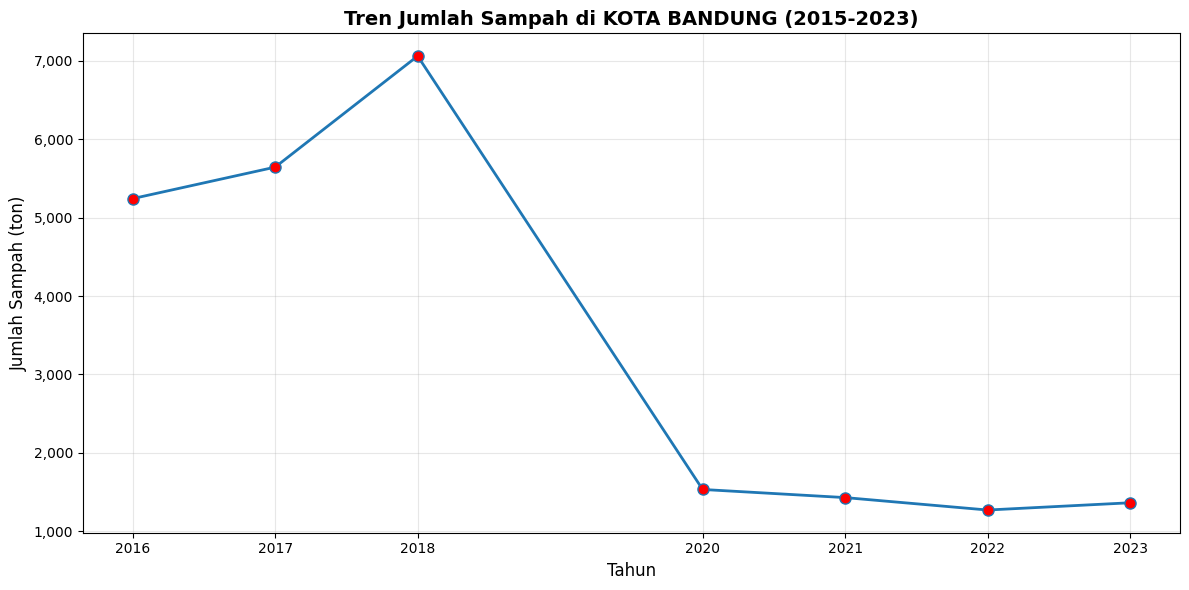

Interpretasi Grafik:
1. Tren: Cenderung turun
2. Lonjakan signifikan: Ya, pada tahun 2018
3. Pola penanganan: Berdasarkan tren yang terlihat, perlu evaluasi terhadap efektivitas program pengelolaan sampah


In [40]:
# Tugas 9
import matplotlib.pyplot as plt

# 1. DataFrame sudah ada
# 2. Pilih kabupaten/kota (gunakan KOTA BANDUNG dari soal 7)
kabupaten_pilihan = 'KOTA BANDUNG'

# 3. Filter data
df_visualisasi = df[df['nama_kabupaten_kota'] == kabupaten_pilihan].sort_values('tahun')

# 4. Buat grafik garis
plt.figure(figsize=(12, 6))
plt.plot(df_visualisasi['tahun'], df_visualisasi['jumlah_sampah'], 
         marker='o', linewidth=2, markersize=8, markerfacecolor='red')

# Formatting grafik
plt.title(f'Tren Jumlah Sampah di {kabupaten_pilihan} (2015-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Sampah (ton)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df_visualisasi['tahun'])

# Format y-axis dengan separator ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

print("Interpretasi Grafik:")
print("1. Tren: ", end="")
# Analisis tren sederhana
if df_visualisasi['jumlah_sampah'].iloc[-1] > df_visualisasi['jumlah_sampah'].iloc[0]:
    print("Cenderung naik")
elif df_visualisasi['jumlah_sampah'].iloc[-1] < df_visualisasi['jumlah_sampah'].iloc[0]:
    print("Cenderung turun")
else:
    print("Stabil")

print("2. Lonjakan signifikan: ", end="")
# Cek apakah ada peningkatan > 20% dari tahun sebelumnya
df_visualisasi['peningkatan'] = df_visualisasi['jumlah_sampah'].pct_change() * 100
lonjakan = df_visualisasi[df_visualisasi['peningkatan'] > 20]
if not lonjakan.empty:
    tahun_lonjakan = lonjakan['tahun'].iloc[0]
    print(f"Ya, pada tahun {tahun_lonjakan}")
else:
    print("Tidak ada lonjakan signifikan")

print("3. Pola penanganan: Berdasarkan tren yang terlihat, perlu evaluasi terhadap efektivitas program pengelolaan sampah")